### Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

| Gráfico         | Tipo de variable           | Nº de variables | Uso típico                                                  | Función Seaborn / Matplotlib     |
|----------------|----------------------------|------------------|--------------------------------------------------------------|----------------------------------|
| **Histograma** | Numérica (cuantitativa)    | Univariada       | Distribución de frecuencia de una variable numérica          | `sns.histplot()`                 |
| **Countplot**  | Categórica                 | Univariada       | Conteo de ocurrencias por categoría                          | `sns.countplot()`                |
| **Barplot**    | Categórica + Numérica      | Bivariada        | Comparar medias (o sumas) de una variable numérica por grupo | `sns.barplot()`                  |
| **Boxplot**    | Numérica + Categórica      | Bivariada        | Distribución, mediana y valores atípicos por categoría       | `sns.boxplot()`                  |
| **Scatterplot**| Numérica + Numérica        | Bivariada        | Relación entre dos variables numéricas (correlación)         | `sns.scatterplot()`              |
| **Gráfico de Tarta** | Categórica            | Univariada       | Proporción relativa entre categorías                        | `plt.pie()` (con Matplotlib)     |

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df_visual = pd.read_csv("Files/datos_limpios.csv", index_col=0)

df_visual.head()

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,Is Active
loyalty_number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,True
100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,79259.0,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,True
100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79259.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,True
100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,True
100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,True


In [3]:
# Los restauramos para mantener la consistencia con el notebook de limpieza.
columnas_a_convertir = ['cancellation_year', 'cancellation_month']

for col in columnas_a_convertir:
    df_visual[col] = df_visual[col].astype('Int64')

# Comprobamos los tipos de datos para confirmar el cambio.
print("Tipos de datos después de la corrección:")
df_visual.info()


Tipos de datos después de la corrección:
<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 100018 to 999986
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         403760 non-null  int64  
 1   month                        403760 non-null  int64  
 2   flights_booked               403760 non-null  int64  
 3   flights_with_companions      403760 non-null  int64  
 4   total_flights                403760 non-null  int64  
 5   distance                     403760 non-null  int64  
 6   points_accumulated           403760 non-null  float64
 7   points_redeemed              403760 non-null  int64  
 8   dollar_cost_points_redeemed  403760 non-null  int64  
 9   province                     403760 non-null  object 
 10  city                         403760 non-null  object 
 11  postal_code                  403760 non-null  object 
 12  gender           

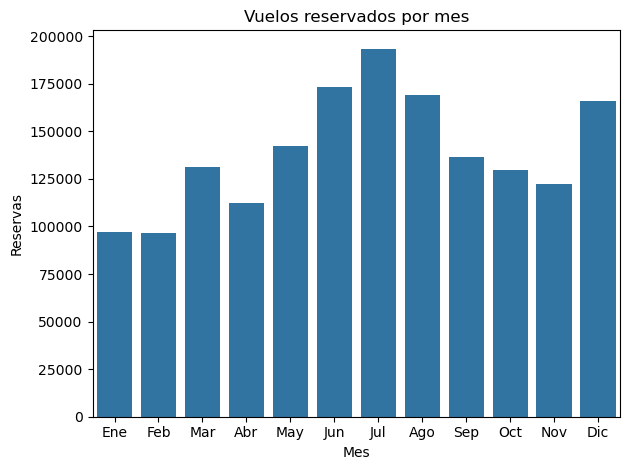

👉 Hay temporadas altas claras, con más vuelos en julio, agosto y diciembre. Esto sugiere que la mayoría de los clientes viajan más en verano y navidades, lo cual puede estar vinculado a vacaciones o festividades.


In [4]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
monthly_flights = df_visual.groupby("month")["flights_booked"].sum().reset_index()

sns.barplot(x="month", y="flights_booked", data=monthly_flights)
plt.title("Vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Reservas")
plt.xticks(range(0, 12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.tight_layout()
plt.show()
print("👉 Hay temporadas altas claras, con más vuelos en julio, agosto y diciembre. Esto sugiere que la mayoría de los clientes viajan más en verano y navidades, lo cual puede estar vinculado a vacaciones o festividades.")


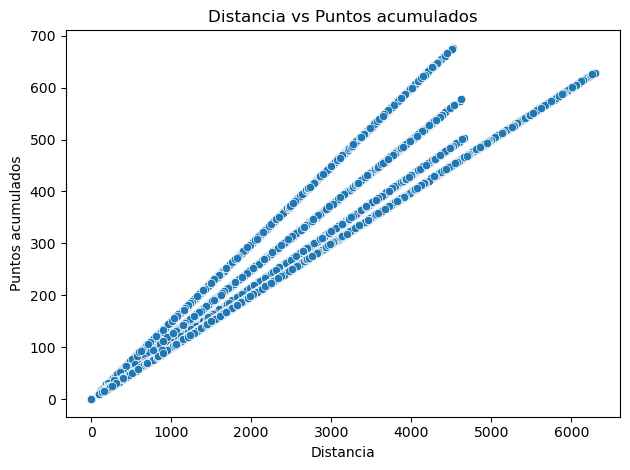

👉 Se ve una tendencia creciente: a mayor distancia del vuelo, mayor cantidad de puntos ganados.


In [5]:
 #2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados?
sns.scatterplot(x="distance", y="points_accumulated", data=df_visual)
plt.title("Distancia vs Puntos acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.tight_layout()
plt.show()
print("👉 Se ve una tendencia creciente: a mayor distancia del vuelo, mayor cantidad de puntos ganados.")

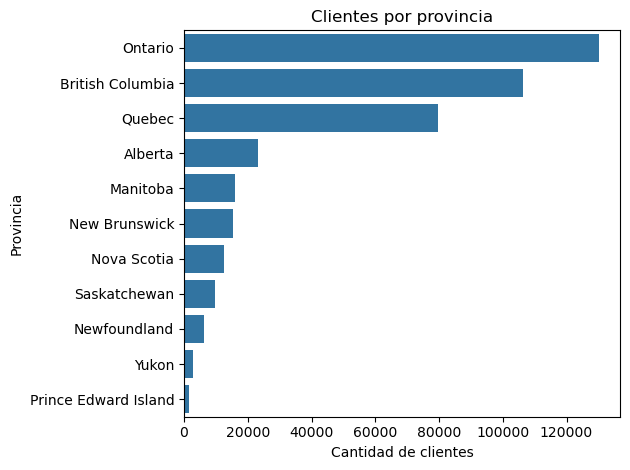

👉 Hay desigualdad notable en la cantidad de clientes según la provincia. Quizás se puedan hacer campañas de marketing para aumentar lo vuelos.


In [6]:
# 3. ¿Cuál es la distribución de los clientes por provincia?
province_counts = df_visual["province"].value_counts().reset_index()
province_counts.columns = ["province", "count"]

sns.barplot(data=province_counts, y="province", x="count")
plt.title("Clientes por provincia")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()
print("👉 Hay desigualdad notable en la cantidad de clientes según la provincia. Quizás se puedan hacer campañas de marketing para aumentar lo vuelos.")

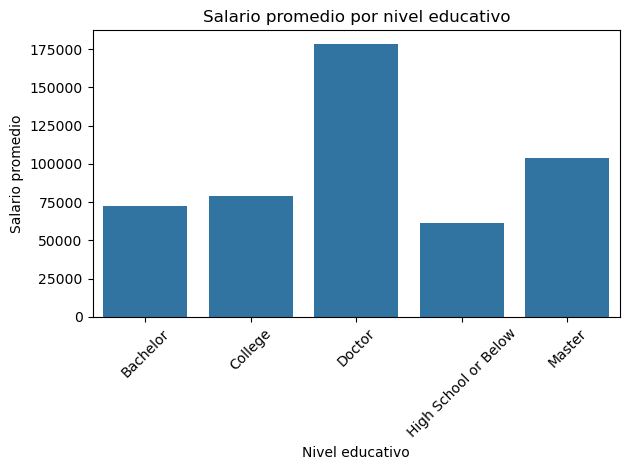

👉 Esto revela que cuanto mayor el nivel educativo, mayor la remuneración promedio.


In [7]:
# 4. ¿Cómo se compara el salario promedio entre los niveles educativos?
salary_edu = df_visual.groupby("education")["salary"].mean().reset_index().dropna()

sns.barplot(data=salary_edu, x="education", y="salary")
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("👉 Esto revela que cuanto mayor el nivel educativo, mayor la remuneración promedio.")

Análisis de métricas promedio por tipo de tarjeta de fidelización:
                       clv  total_flights     distance  points_accumulated
loyalty_card                                                              
Aurora        10673.621876       5.190324  1218.433371          128.396688
Nova           8046.609368       5.158909  1208.452971          123.983670
Star           6735.573925       5.170426  1217.139481          122.602552


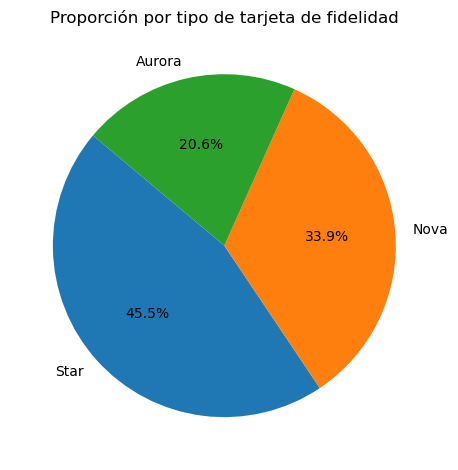

🏆 Ranking de Tarjetas de Fidelidad:
🥇 Aurora (Nivel más alto)
🥈 Nova (Nivel intermedio)
🥉 Star (Nivel más bajo)


In [19]:
# 5. ¿Cuál es la proporción de clientes por tipo de tarjeta de fidelidad?

# Analizamos la relación entre 'loyalty_card' y otras métricas clave para inferir el ranking.
# Calculamos el promedio de varias columnas para cada tipo de tarjeta.

card_ranking_analysis = df_visual.groupby('loyalty_card')[[
    'clv',
    'total_flights',
    'distance',
    'points_accumulated',
]].mean().sort_values(by='clv', ascending=False)

print("Análisis de métricas promedio por tipo de tarjeta de fidelización:")
print(card_ranking_analysis)

card_counts = df_visual["loyalty_card"].value_counts()

plt.pie(card_counts, labels=card_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Proporción por tipo de tarjeta de fidelidad")
plt.tight_layout()
plt.show()
print("🏆 Ranking de Tarjetas de Fidelidad:")
print("🥇 Aurora (Nivel más alto)")
print("🥈 Nova (Nivel intermedio)")
print("🥉 Star (Nivel más bajo)")

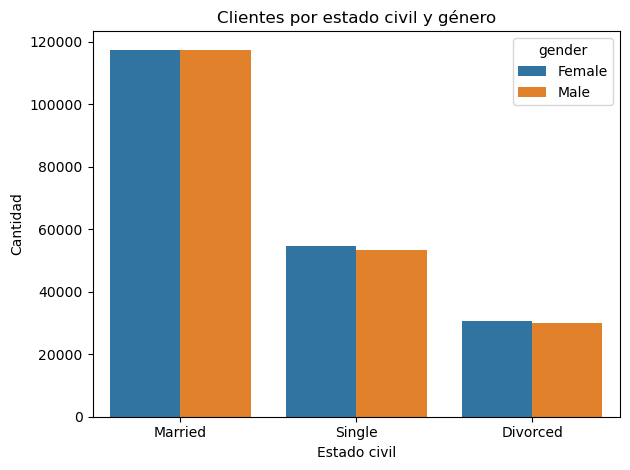

👉  Estado civil y género está muy equiparado, y aquellos con estado civil de casado viajan mucho más en comparación con solteros o divorciados.


In [21]:
#6. ¿Cómo se distribuyen los clientes por estado civil y género?
sns.countplot(data=df_visual, x="marital_status", hue="gender")
plt.title("Clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()
print("👉  Estado civil y género está muy equiparado, y aquellos con estado civil de casado viajan mucho más en comparación con solteros o divorciados." )

...Fin.